# Objectives

- View the Liquidity provider token as derivative
- Compare that to a standard derivative 
- Understand why an LP might provide liquidity other than to simply earn fees

# Prerequisites

- Metamask
- Web3 python

# Derivatives and their payoff functions

Investing has grown more complicated in recent decades with the creation of numerous derivative instruments offering new ways to manage money. The use of derivatives to hedge risk or improve returns has been around for generations.

**Options** are the simplest derivative investment. Their value is tied to the value of the contract's underlying security. Options give a buyer the opportunity to buy or sell the underlying security. The investor does not own the underlying asset but they make a bet on the direction of its price movement.

The payoff function of an option shows the profit/loss obtained from an option depending on its market price.

There are many types of derivative instruments, including options, swaps, futures, and forward contracts. Derivatives have numerous uses and various levels of risks but are generally considered a sound way to participate in the financial markets.

## Example: Call/Put Options

Here, we only discuss European options.

### Call Option

A call option is a type of option that gives the holder the right to buy the underlying asset at a specified price, known as the strike price, before the option expires, with the cost of the premium. If the price of the underlying asset rises above the strike price, the holder can exercise the option and purchase the asset at the lower strike price, then sell it at the higher market price for a profit. If the price does not rise above the strike price, the holder can choose not to exercise the option and simply let it expire worthless. 

![Call Option Payoff Function](img/calloption.png)

### Put Option

On the other hand, a put option is a type of option that gives the holder the right to sell the underlying asset at a specified price, before the option expires. If the price of the underlying asset falls below the strike price, the holder can exercise the option and sell the asset at the higher strike price, then buy it back at the lower market price for a profit. If the price does not fall below the strike price, the holder can choose not to exercise the option and simply let it expire worthless. In both cases, the holder pays a premium for the option contract, which is the price of the option, and if the option is not exercised, this premium represents a loss for the holder.

![Put Option Payoff Function](img/putoption.png)


On the other hand, a put option is a type of option that gives the holder the right to sell the underlying asset at a specified price, before the option expires. If the price of the underlying asset falls below the strike price, the holder can exercise the option and sell the asset at the higher strike price, then buy it back at the lower market price for a profit. If the price does not fall below the strike price, the holder can choose not to exercise the option and simply let it expire worthless. In both cases, the holder pays a premium for the option contract, which is the price of the option, and if the option is not exercised, this premium represents a loss for the holder. Its payoff function has been shown above.




- Put token HUSD as 0xe41Fa6BF04aAF0dD6E44d62b1A1Bd8209dc06f69
- Put token DAI as 0x5917d1F609999CaA65D028213CA81c12B3b09cD7


## Connect to web3 API

In [ ]:
from web3 import Web3
from datetime import datetime, timedelta

w3 = Web3(Web3.HTTPProvider('https://sepolia.infura.io/v3/your-infura-key'))

print(w3.__dict__)
print(w3.eth.get_block_number())

{'manager': <web3.manager.RequestManager object at 0x114ccb1d0>, 'codec': <eth_abi.codec.ABICodec object at 0x123562210>, 'eth': <web3.eth.eth.Eth object at 0x123562710>, 'net': <web3.net.Net object at 0x123562b10>, 'geth': <web3.geth.Geth object at 0x123562c10>, 'tracing': <web3.tracing.Tracing object at 0x123562f50>, 'testing': <web3.testing.Testing object at 0x123563010>, '_ens': <web3._utils.empty.Empty object at 0x117b2b610>}
8169604


In [ ]:
your_address = Web3.to_checksum_address('public_address')
your_private_key = 'private_key'

## Identify the DAI/HUSD pool

In [4]:
factory_addr = Web3.to_checksum_address('0x0227628f3F023bb0B980b67D528571c95c6DaC1c') #Uniswap V3 factory contract address sepolia
abi_factory = '[{"inputs":[],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"uint24","name":"fee","type":"uint24"},{"indexed":true,"internalType":"int24","name":"tickSpacing","type":"int24"}],"name":"FeeAmountEnabled","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"oldOwner","type":"address"},{"indexed":true,"internalType":"address","name":"newOwner","type":"address"}],"name":"OwnerChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"token0","type":"address"},{"indexed":true,"internalType":"address","name":"token1","type":"address"},{"indexed":true,"internalType":"uint24","name":"fee","type":"uint24"},{"indexed":false,"internalType":"int24","name":"tickSpacing","type":"int24"},{"indexed":false,"internalType":"address","name":"pool","type":"address"}],"name":"PoolCreated","type":"event"},{"inputs":[{"internalType":"address","name":"tokenA","type":"address"},{"internalType":"address","name":"tokenB","type":"address"},{"internalType":"uint24","name":"fee","type":"uint24"}],"name":"createPool","outputs":[{"internalType":"address","name":"pool","type":"address"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint24","name":"fee","type":"uint24"},{"internalType":"int24","name":"tickSpacing","type":"int24"}],"name":"enableFeeAmount","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint24","name":"","type":"uint24"}],"name":"feeAmountTickSpacing","outputs":[{"internalType":"int24","name":"","type":"int24"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"},{"internalType":"address","name":"","type":"address"},{"internalType":"uint24","name":"","type":"uint24"}],"name":"getPool","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"parameters","outputs":[{"internalType":"address","name":"factory","type":"address"},{"internalType":"address","name":"token0","type":"address"},{"internalType":"address","name":"token1","type":"address"},{"internalType":"uint24","name":"fee","type":"uint24"},{"internalType":"int24","name":"tickSpacing","type":"int24"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_owner","type":"address"}],"name":"setOwner","outputs":[],"stateMutability":"nonpayable","type":"function"}]'
factory_contract = w3.eth.contract(factory_addr, abi=abi_factory)

dai_token_address = Web3.to_checksum_address('0x5917d1F609999CaA65D028213CA81c12B3b09cD7')
husd_token_address = Web3.to_checksum_address('0xe41Fa6BF04aAF0dD6E44d62b1A1Bd8209dc06f69')
abi_dai = '[{"inputs":[{"internalType":"string","name":"name","type":"string"},{"internalType":"string","name":"symbol","type":"string"},{"internalType":"address","name":"_HUSDAddress","type":"address"}],"stateMutability":"nonpayable","type":"constructor"},{"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"allowance","type":"uint256"},{"internalType":"uint256","name":"needed","type":"uint256"}],"name":"ERC20InsufficientAllowance","type":"error"},{"inputs":[{"internalType":"address","name":"sender","type":"address"},{"internalType":"uint256","name":"balance","type":"uint256"},{"internalType":"uint256","name":"needed","type":"uint256"}],"name":"ERC20InsufficientBalance","type":"error"},{"inputs":[{"internalType":"address","name":"approver","type":"address"}],"name":"ERC20InvalidApprover","type":"error"},{"inputs":[{"internalType":"address","name":"receiver","type":"address"}],"name":"ERC20InvalidReceiver","type":"error"},{"inputs":[{"internalType":"address","name":"sender","type":"address"}],"name":"ERC20InvalidSender","type":"error"},{"inputs":[{"internalType":"address","name":"spender","type":"address"}],"name":"ERC20InvalidSpender","type":"error"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"spender","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"from","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"burnToken","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"mintToken","type":"event"},{"inputs":[],"name":"HUSD","outputs":[{"internalType":"contract IERC20","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"address","name":"spender","type":"address"}],"name":"allowance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"approve","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"account","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"burn","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"mint","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"transfer","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"transferFrom","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"}]'
abi_husd = '[{"inputs":[],"stateMutability":"nonpayable","type":"constructor"},{"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"allowance","type":"uint256"},{"internalType":"uint256","name":"needed","type":"uint256"}],"name":"ERC20InsufficientAllowance","type":"error"},{"inputs":[{"internalType":"address","name":"sender","type":"address"},{"internalType":"uint256","name":"balance","type":"uint256"},{"internalType":"uint256","name":"needed","type":"uint256"}],"name":"ERC20InsufficientBalance","type":"error"},{"inputs":[{"internalType":"address","name":"approver","type":"address"}],"name":"ERC20InvalidApprover","type":"error"},{"inputs":[{"internalType":"address","name":"receiver","type":"address"}],"name":"ERC20InvalidReceiver","type":"error"},{"inputs":[{"internalType":"address","name":"sender","type":"address"}],"name":"ERC20InvalidSender","type":"error"},{"inputs":[{"internalType":"address","name":"spender","type":"address"}],"name":"ERC20InvalidSpender","type":"error"},{"inputs":[{"internalType":"address","name":"owner","type":"address"}],"name":"OwnableInvalidOwner","type":"error"},{"inputs":[{"internalType":"address","name":"account","type":"address"}],"name":"OwnableUnauthorizedAccount","type":"error"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"spender","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"previousOwner","type":"address"},{"indexed":true,"internalType":"address","name":"newOwner","type":"address"}],"name":"OwnershipTransferred","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"address","name":"spender","type":"address"}],"name":"allowance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"approve","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"account","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"mint","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"renounceOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"transfer","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"transferFrom","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"newOwner","type":"address"}],"name":"transferOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"}]'

In [5]:
dai_contract = w3.eth.contract(dai_token_address,abi=abi_dai)
dai_contract

In [6]:
husd_contract = w3.eth.contract(husd_token_address,abi=abi_husd)
husd_contract

In [7]:
def get_pool_address(tokenA, tokenB, fee,factory_contract):
    # Ensure tokens are in correct order (Uniswap V3 requires sorted token addresses)
    if tokenA > tokenB:
        tokenA, tokenB = tokenB, tokenA

    # Call the getPool function
    pool_address = factory_contract.functions.getPool(tokenA, tokenB, fee).call()
    return pool_address
dai_husd_pool_address = get_pool_address(dai_token_address,husd_token_address,500,factory_contract)
abi_pool = '[{"inputs":[],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"int24","name":"tickLower","type":"int24"},{"indexed":true,"internalType":"int24","name":"tickUpper","type":"int24"},{"indexed":false,"internalType":"uint128","name":"amount","type":"uint128"},{"indexed":false,"internalType":"uint256","name":"amount0","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1","type":"uint256"}],"name":"Burn","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":false,"internalType":"address","name":"recipient","type":"address"},{"indexed":true,"internalType":"int24","name":"tickLower","type":"int24"},{"indexed":true,"internalType":"int24","name":"tickUpper","type":"int24"},{"indexed":false,"internalType":"uint128","name":"amount0","type":"uint128"},{"indexed":false,"internalType":"uint128","name":"amount1","type":"uint128"}],"name":"Collect","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"sender","type":"address"},{"indexed":true,"internalType":"address","name":"recipient","type":"address"},{"indexed":false,"internalType":"uint128","name":"amount0","type":"uint128"},{"indexed":false,"internalType":"uint128","name":"amount1","type":"uint128"}],"name":"CollectProtocol","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"sender","type":"address"},{"indexed":true,"internalType":"address","name":"recipient","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount0","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"paid0","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"paid1","type":"uint256"}],"name":"Flash","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint16","name":"observationCardinalityNextOld","type":"uint16"},{"indexed":false,"internalType":"uint16","name":"observationCardinalityNextNew","type":"uint16"}],"name":"IncreaseObservationCardinalityNext","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint160","name":"sqrtPriceX96","type":"uint160"},{"indexed":false,"internalType":"int24","name":"tick","type":"int24"}],"name":"Initialize","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"sender","type":"address"},{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"int24","name":"tickLower","type":"int24"},{"indexed":true,"internalType":"int24","name":"tickUpper","type":"int24"},{"indexed":false,"internalType":"uint128","name":"amount","type":"uint128"},{"indexed":false,"internalType":"uint256","name":"amount0","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1","type":"uint256"}],"name":"Mint","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint8","name":"feeProtocol0Old","type":"uint8"},{"indexed":false,"internalType":"uint8","name":"feeProtocol1Old","type":"uint8"},{"indexed":false,"internalType":"uint8","name":"feeProtocol0New","type":"uint8"},{"indexed":false,"internalType":"uint8","name":"feeProtocol1New","type":"uint8"}],"name":"SetFeeProtocol","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"sender","type":"address"},{"indexed":true,"internalType":"address","name":"recipient","type":"address"},{"indexed":false,"internalType":"int256","name":"amount0","type":"int256"},{"indexed":false,"internalType":"int256","name":"amount1","type":"int256"},{"indexed":false,"internalType":"uint160","name":"sqrtPriceX96","type":"uint160"},{"indexed":false,"internalType":"uint128","name":"liquidity","type":"uint128"},{"indexed":false,"internalType":"int24","name":"tick","type":"int24"}],"name":"Swap","type":"event"},{"inputs":[{"internalType":"int24","name":"tickLower","type":"int24"},{"internalType":"int24","name":"tickUpper","type":"int24"},{"internalType":"uint128","name":"amount","type":"uint128"}],"name":"burn","outputs":[{"internalType":"uint256","name":"amount0","type":"uint256"},{"internalType":"uint256","name":"amount1","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"recipient","type":"address"},{"internalType":"int24","name":"tickLower","type":"int24"},{"internalType":"int24","name":"tickUpper","type":"int24"},{"internalType":"uint128","name":"amount0Requested","type":"uint128"},{"internalType":"uint128","name":"amount1Requested","type":"uint128"}],"name":"collect","outputs":[{"internalType":"uint128","name":"amount0","type":"uint128"},{"internalType":"uint128","name":"amount1","type":"uint128"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"recipient","type":"address"},{"internalType":"uint128","name":"amount0Requested","type":"uint128"},{"internalType":"uint128","name":"amount1Requested","type":"uint128"}],"name":"collectProtocol","outputs":[{"internalType":"uint128","name":"amount0","type":"uint128"},{"internalType":"uint128","name":"amount1","type":"uint128"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"factory","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"fee","outputs":[{"internalType":"uint24","name":"","type":"uint24"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"feeGrowthGlobal0X128","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"feeGrowthGlobal1X128","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"recipient","type":"address"},{"internalType":"uint256","name":"amount0","type":"uint256"},{"internalType":"uint256","name":"amount1","type":"uint256"},{"internalType":"bytes","name":"data","type":"bytes"}],"name":"flash","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint16","name":"observationCardinalityNext","type":"uint16"}],"name":"increaseObservationCardinalityNext","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint160","name":"sqrtPriceX96","type":"uint160"}],"name":"initialize","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"liquidity","outputs":[{"internalType":"uint128","name":"","type":"uint128"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"maxLiquidityPerTick","outputs":[{"internalType":"uint128","name":"","type":"uint128"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"recipient","type":"address"},{"internalType":"int24","name":"tickLower","type":"int24"},{"internalType":"int24","name":"tickUpper","type":"int24"},{"internalType":"uint128","name":"amount","type":"uint128"},{"internalType":"bytes","name":"data","type":"bytes"}],"name":"mint","outputs":[{"internalType":"uint256","name":"amount0","type":"uint256"},{"internalType":"uint256","name":"amount1","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"","type":"uint256"}],"name":"observations","outputs":[{"internalType":"uint32","name":"blockTimestamp","type":"uint32"},{"internalType":"int56","name":"tickCumulative","type":"int56"},{"internalType":"uint160","name":"secondsPerLiquidityCumulativeX128","type":"uint160"},{"internalType":"bool","name":"initialized","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint32[]","name":"secondsAgos","type":"uint32[]"}],"name":"observe","outputs":[{"internalType":"int56[]","name":"tickCumulatives","type":"int56[]"},{"internalType":"uint160[]","name":"secondsPerLiquidityCumulativeX128s","type":"uint160[]"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"name":"positions","outputs":[{"internalType":"uint128","name":"liquidity","type":"uint128"},{"internalType":"uint256","name":"feeGrowthInside0LastX128","type":"uint256"},{"internalType":"uint256","name":"feeGrowthInside1LastX128","type":"uint256"},{"internalType":"uint128","name":"tokensOwed0","type":"uint128"},{"internalType":"uint128","name":"tokensOwed1","type":"uint128"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"protocolFees","outputs":[{"internalType":"uint128","name":"token0","type":"uint128"},{"internalType":"uint128","name":"token1","type":"uint128"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint8","name":"feeProtocol0","type":"uint8"},{"internalType":"uint8","name":"feeProtocol1","type":"uint8"}],"name":"setFeeProtocol","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"slot0","outputs":[{"internalType":"uint160","name":"sqrtPriceX96","type":"uint160"},{"internalType":"int24","name":"tick","type":"int24"},{"internalType":"uint16","name":"observationIndex","type":"uint16"},{"internalType":"uint16","name":"observationCardinality","type":"uint16"},{"internalType":"uint16","name":"observationCardinalityNext","type":"uint16"},{"internalType":"uint8","name":"feeProtocol","type":"uint8"},{"internalType":"bool","name":"unlocked","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"int24","name":"tickLower","type":"int24"},{"internalType":"int24","name":"tickUpper","type":"int24"}],"name":"snapshotCumulativesInside","outputs":[{"internalType":"int56","name":"tickCumulativeInside","type":"int56"},{"internalType":"uint160","name":"secondsPerLiquidityInsideX128","type":"uint160"},{"internalType":"uint32","name":"secondsInside","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"recipient","type":"address"},{"internalType":"bool","name":"zeroForOne","type":"bool"},{"internalType":"int256","name":"amountSpecified","type":"int256"},{"internalType":"uint160","name":"sqrtPriceLimitX96","type":"uint160"},{"internalType":"bytes","name":"data","type":"bytes"}],"name":"swap","outputs":[{"internalType":"int256","name":"amount0","type":"int256"},{"internalType":"int256","name":"amount1","type":"int256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"int16","name":"","type":"int16"}],"name":"tickBitmap","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"tickSpacing","outputs":[{"internalType":"int24","name":"","type":"int24"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"int24","name":"","type":"int24"}],"name":"ticks","outputs":[{"internalType":"uint128","name":"liquidityGross","type":"uint128"},{"internalType":"int128","name":"liquidityNet","type":"int128"},{"internalType":"uint256","name":"feeGrowthOutside0X128","type":"uint256"},{"internalType":"uint256","name":"feeGrowthOutside1X128","type":"uint256"},{"internalType":"int56","name":"tickCumulativeOutside","type":"int56"},{"internalType":"uint160","name":"secondsPerLiquidityOutsideX128","type":"uint160"},{"internalType":"uint32","name":"secondsOutside","type":"uint32"},{"internalType":"bool","name":"initialized","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"token0","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"token1","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"}]'
print(dai_husd_pool_address)
dai_husd_pool = w3.eth.contract(dai_husd_pool_address, abi=abi_pool)
dai_husd_pool 

0x06813a1942A8ea7b2440D0286aa32292e80D3083


## Compare Uniswap V2 and V3

Uniswap V2 and V3 has differernt liquidity function, which is generated by the range of pool. In Uniswap V2, we set the range is $\left( 0,\infty \right)$ and in Uniswap V3, we set the price range $\left[ p_a,p_b\right]$ at the beginning, which is can be seen in the following picture. This picture depicts the relationship for a position on a range $\left[ p_a,p_b\right]$ and a current price $p_c \in \left[ p_a,p_b\right]$. $x_{real}$ and $y_{real}$
denote the position’s real reserves. If you are interested in more details, please see [here](https://uniswap.org/whitepaper-v3.pdf).

![Uniswap V3 Liquidity Function](img/UniswapV3.png)

When calculate the payoff with different price, we first need the value of price, there are two ways to get. Traditionally, we calculate the price of Uniswap V2 and V3 by definition. 

In Uniswap V2, liquidity was distributed uniformly along the x*y=K, then we know that $(x-\Delta x)(y+\Delta y) = x*y$.

Then it's easy to conduct the price in Uniswap V2: $\frac{\Delta y}{\Delta x} = \frac{y}{x}$. 

In Uniswap V3, The amount of liquidity provided can be measured by the value $L$, which is equal to $\sqrt K$. The real reserves of a position are described by the curve: $(x+\frac{L}{\sqrt p_b})(y+L\sqrt p_a)=L^2$. Similarly, we can calculate the price in Uniswap V3: $\frac{\Delta y}{\Delta x} = \frac{y+L\sqrt p_a}{x+\frac{L}{\sqrt p_b}}$. But because of the existence of ``Unclaimed fees`` in the Uniswap pool, this traditional way is not credible.

So, we have to use another way - ``slot0`` function. Please note the positions of tokenA and tokeB in this method. 



## Define the payoff function

In [ ]:
def getLPpayoff():

    #current reserves for each tokens
    DAI_reserve = dai_contract.functions.balanceOf(dai_husd_pool_address).call() / 10**18
    HUSD_reserve = husd_contract.functions.balanceOf(dai_husd_pool_address).call() / 10**18
    
    DAI_price = dai_husd_pool.functions.slot0().call()[0]**2 / 2**192
    
    # HUSD_payoff = ?? 
    
    return ('price:', DAI_price , 'payoff:', HUSD_payoff)

## Calculate LP token payoffs

We now calculate LP payoffs for a range of prices. To do that, the TA will manipualte the pool price by doing large swaps.

In [87]:
# V2
DAI_prices_V2 = []
HUSD_payoffs_V2 = []

In [ ]:
result = getLPpayoff()
if len(DAI_prices_V2)==0:
    DAI_prices_V2.append(result[1])
if len(DAI_prices_V2)>0 and result[1]!=DAI_prices_V2[-1]:
    DAI_prices_V2.append(result[1])

DAI_prices_V2

[9926.725815873671,
 22327.539861877744,
 39686.65552722323,
 62004.07281191012,
 89279.79171593842,
 121513.81223930813,
 158230.19591366124,
 200321.2902915896,
 247370.68628885938,
 299378.38390547055]

In [139]:
if len(HUSD_payoffs_V2)==0:
    HUSD_payoffs_V2.append(result[3])
if len(HUSD_payoffs_V2)>0 and result[3]!=HUSD_payoffs_V2[-1]:
    HUSD_payoffs_V2.append(result[3])

HUSD_payoffs_V2

[20000.200000000004,
 29997.699999999997,
 39995.2,
 49992.7,
 59990.200000000004,
 69987.70000000001,
 79881.87692679423,
 89881.15306790451,
 99880.63843720127,
 109880.3330346845]

Here is one iteration for swap, TA will swap in the similar way to get multiple data.

In [47]:
DAI_prices_V3 = []
HUSD_payoffs_V3 = []

In [66]:
result = getLPpayoff()
if len(DAI_prices_V3)==0:
    DAI_prices_V3.append(result[1])
if len(DAI_prices_V3)>0 and result[1]!= DAI_prices_V3[-1]:
    DAI_prices_V3.append(result[1])
DAI_prices_V3

[10225.680022822857,
 15512.449527728983,
 21896.856439095955,
 29378.900756923766,
 37958.58248121242,
 47635.90161196192,
 58410.85814917226,
 70283.45209284345,
 83253.68344297547,
 97321.55219956834]

In [67]:
if len(HUSD_payoffs_V3)==0:
    HUSD_payoffs_V3.append(result[3])
if len(HUSD_payoffs_V3)>0 and result[3]!= HUSD_payoffs_V3[-1]:
    HUSD_payoffs_V3.append(result[3])
HUSD_payoffs_V3

[20678.154968238232,
 25183.9625526639,
 29172.29003392919,
 32643.137412034084,
 35596.504686978595,
 38032.39185876273,
 39950.798927386466,
 41351.72589284982,
 42235.17275515279,
 42601.13951429537]

## Plot LP token payoffs

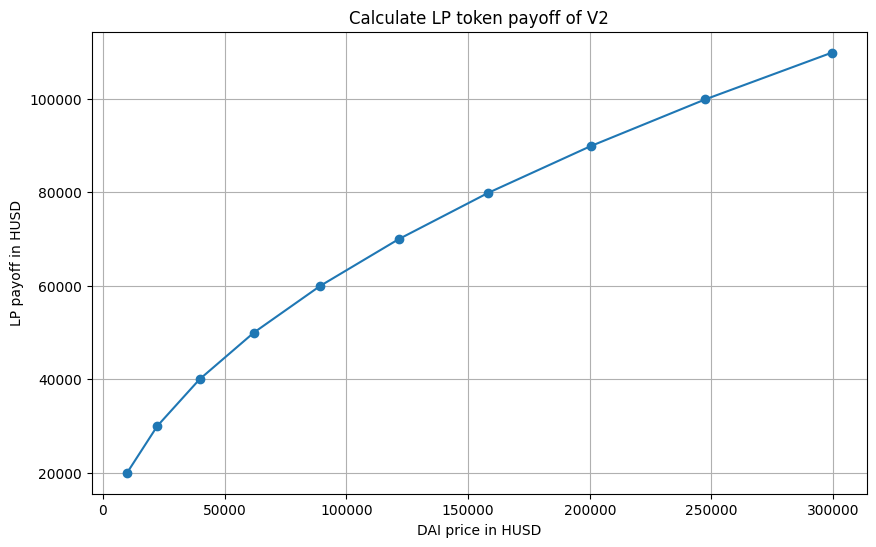

In [10]:
# draw the plot for V2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(DAI_prices_V2,HUSD_payoffs_V2, marker = 'o')
plt.xlabel('DAI price in HUSD')
plt.ylabel('LP payoff in HUSD')
plt.title('Calculate LP token payoff of V2')
plt.grid(True)
plt.show()

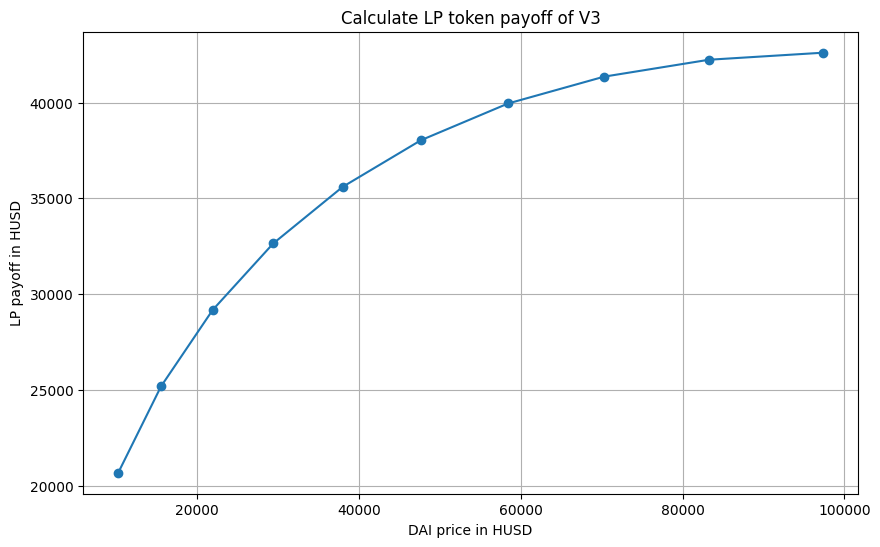

In [68]:
# draw the plot for V3

plt.figure(figsize=(10, 6))
plt.plot(DAI_prices_V3,HUSD_payoffs_V3, marker = 'o')
plt.xlabel('DAI price in HUSD')
plt.ylabel('LP payoff in HUSD')
plt.title('Calculate LP token payoff of V3')
plt.grid(True)
plt.show()

Make sure to save the plot obtained above on your machine.

## Replicating market makers

Turns out you can generate a rich family of payoffs using a CFMM. In fact there is a one-to-one mapping between concave payoffs and CFMM bonding curves! Convex payoffs can be obtained by shorting an LP token.

This implies that LPs might not invest money in pools to just earn fees, they might also want to take bets on prices of the underlying tokens, or hedge their other investments in some way. We can tailor the bonding curve based on the sort of payoff function the LP is looking for.

If anyone is interested to know this mapping and how it is obtained, see [this paper](https://arxiv.org/pdf/2103.14769.pdf). 



# Optional: Perpetuals

**So What is a Perpetual?**

You can think of a Perpetual as a synthetic asset, that tracks the price of an underlying asset. This synthetic asset is created by two sides of the market which are either long - expecting it to go up - or short - expecting it to go down. Within each position, market participants are basically agreeing to buy or sell the asset in the future **at the price of the asset, at the time they acquired the long or short perpetual**. Now if the price goes up, people who agreed to buy it will profit because they have an agreement to buy it for cheaper than the market price, and the same holds vice versa. Oh and one more thing, since you are just agreeing to hypothetically buy or sell the asset in the future, you don't actually have to put up any money to buy it, all you have to put up is some amount of collateral, so that if your position is losing money the protocol has your collateral to pay for your losses, if you lose the value of all of your collateral below some limit defined by the protocol, your position gets liquidated, i.e. the protocol takes your collateral to pay the winners and then sells your position to someone who can put up fresh collateral.

**So how does someone actually profit - or lose money - from a perpetual?**

When they want to close their position, they just sell this long or short perpetual they aquired and will get their profit. If everything is working correctly, they should be able to sell this contract for a profit or loss that corresponds with how they would do if they held the underlying asset. On different protocols "selling" the position can mean selling it on an order book, to an AMM or just getting compensated for their profits to a liquidity pool.  

**How can a protocol ensure that the price of the perpetual will track the underlying asset?**

Afterall, traders may have a general sentiment, for example that the market is pumping and people expect it will go up a lot, people may be willing to pay more for a long perpetual than what the value should be based on the underlying asset price. To make sure that the price doesn't deviate from the underlying asset price, which is necessary to make this whole thing work, traditional perpetual protocols have a funding rate mechanism that charges periodic fees on the overvalued positions and pays those out to the undervalued positiions. This counteracts the market sentiment and drives the price associated with the perpetual to match that of the underlying asset.

This may all be a little confusing because of the terminology used. Here when we say "the price of the perpetual will track the underlying asset" what we really mean is that the profits you will make from selling this contract you have will corespond to the profits you would make if you were just buying and selling x amount of the underlying asset, where x is your leveraged position.

**Recap**

That was a lot. Let's recap this quickly:

*   Perpetuals are synthetic assets that allow you to bet on the future price of an underlying asset.
*   Perpetuals track the value of the underlying asset through a funding rate mechanism that keeps demand of short and long positions balanced.
*   Because perpetuals do not require the purchase or sale of the underlying asset - except for settlement purposes - you can buy a very big position with a small amount of colateral. You just might get wiped out quickly.

Because you are agreeing to buy and sell in the future, perpetuals are considered a futures contract. However, where traditional futures contracts have expiry dates where something has to be exchanged for something, perpetual contracts do not and will last as long as you hold and don't get liquidated.

## DyDx Testnet Trading Compitition

DyDx is a margin trading protocol that operates on Layer 2 (not directly on the Ethereum blockchain). Thus, transactions we would do on this platform would not appear directly on Etherscan, however, the protocol posts "zero-knowledge proofs" that the transactions have been executed correctly on the chain. We may see what ZK-proofs are in a later lecture.

This lab we are going to have a small trading competition on dydx. For this activity you need to get in groups of up to four people. The trading only should be completed by one member of the group. Now follow these instructions:

- Go to the DyDx platform [website](https://trade.stage.dydx.exchange/portfolio/overview).
- Connect your wallet by providing your signature, this authorizes the DyDx trading API to interact with your wallet.
- Your portfolio would now have test funds of USD 2000 in the DyDx account.
- On the mainnet, this done by depositing USDC to the DyDx smart contract. Equal number of USD are minted on the DyDx Layer 2.
- Go to the "Trade" tab on this website.